In [30]:
import pandas as pd
import numpy as np

In [31]:
train = pd.read_csv("C:\\Users\\Acer\\OneDrive\\Desktop\\avlp\\lp\\train3.csv")
test = pd.read_csv("C:\\Users\\Acer\\OneDrive\\Desktop\\avlp\\lp\\test3.csv")
sampl = pd.read_csv("C:\\Users\\Acer\\OneDrive\\Desktop\\avlp\\lp\\sample_submission3.csv")

In [32]:
train.shape, test.shape, sampl.shape

((614, 13), (367, 12), (367, 2))

In [33]:
sampl.Loan_Status.value_counts()

N    367
Name: Loan_Status, dtype: int64

In [34]:
data = pd.concat([train, test], sort=False)
data.shape

(981, 13)

In [35]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [37]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [38]:
data.select_dtypes(include='object').head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y


In [39]:
data.select_dtypes(include=['int64','float64']).head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0


In [40]:
data.select_dtypes(include='object').isnull().sum()[data.select_dtypes(include='object').isnull().sum()>0]

Gender            24
Married            3
Dependents        25
Self_Employed     55
Loan_Status      367
dtype: int64

In [41]:
data.select_dtypes(include=['int64','float64']).isnull().sum()[data.select_dtypes(include=['int64','float64']).isnull().sum()>0]

LoanAmount          27
Loan_Amount_Term    20
Credit_History      79
dtype: int64

In [42]:
data.Credit_History.value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [43]:
data[data['Credit_History']==0]["Education"].value_counts()

Graduate        106
Not Graduate     42
Name: Education, dtype: int64

## Impute
#### Gender

In [44]:
data['Gender'].fillna(data.Gender.mode()[0], inplace = True)

#### Married

In [46]:
data.Married.fillna(data.Married.mode()[0], inplace=True)

#### Self_Employed

In [48]:
data.Self_Employed.fillna('No', inplace=True)

#### Dependents 

In [50]:
data.Dependents.fillna(data.Dependents.mode()[0], inplace = True)

#### LoanAmount

In [54]:
data.LoanAmount.fillna(data.LoanAmount.mean(), inplace = True)

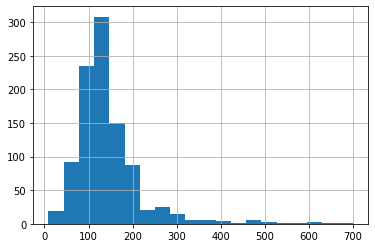

In [56]:
data['LoanAmount'].hist(bins=20) 

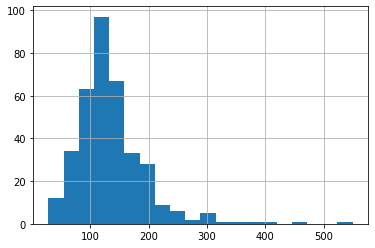

In [57]:
test['LoanAmount'].hist(bins = 20)

In [58]:
data['LoanAmount_log'] = np.log(data.LoanAmount)
# test['LoanAmount_log'] = np.log(test.LoanAmount)

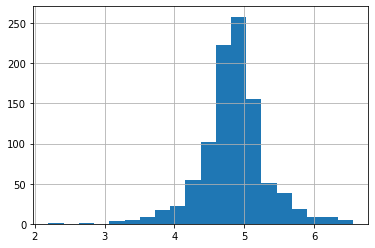

In [59]:
data['LoanAmount_log'].hist(bins=20) 

#### Loan_Amount_Term

In [60]:
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mode()[0], inplace = True)

#### Credit_History

In [61]:
data.Credit_History.fillna(data.Credit_History.mode()[0], inplace = True)

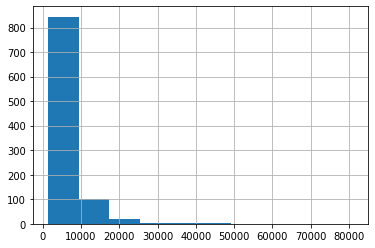

In [62]:
data['TotalIncome'] = data['ApplicantIncome'] + data ['CoapplicantIncome']
data['TotalIncome_Log'] = np.log(data['TotalIncome'])
data.TotalIncome.hist()

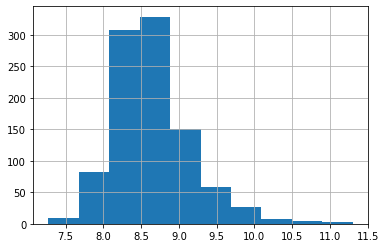

In [63]:
data.TotalIncome_Log.hist()

In [64]:
data.select_dtypes(include='object').isnull().sum()[data.select_dtypes(include='object').isnull().sum()>0]

Loan_Status    367
dtype: int64

In [65]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y,4.959423,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [66]:
OneHotEncoding =  pd.get_dummies(data[['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']])


In [67]:
data = data[['Loan_Status','LoanAmount','ApplicantIncome','CoapplicantIncome']]

In [68]:
total_df = pd.concat([data, OneHotEncoding],axis = 1, sort =False)

In [69]:
total_df.head()

,Loan_Status,LoanAmount,ApplicantIncome,CoapplicantIncome,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,Y,142.51153,5849,0.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,N,128.00000,4583,1508.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,Y,66.00000,3000,0.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,Y,120.00000,2583,2358.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,Y,141.00000,6000,0.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [70]:
train = total_df[:len(train)]
test = total_df[len(train):]

In [71]:
X_train=train.drop(['Loan_Status'],axis=1)
y_train=train['Loan_Status']

In [72]:
test = test.drop(['Loan_Status'],axis=1)

In [73]:
test.shape, X_train.shape

((367, 19), (614, 19))

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, train_size=0.7, random_state=1234)

In [75]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# fit model no training data
model = XGBClassifier()

In [76]:
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_validation)

# evaluate predictions
accuracy = accuracy_score(y_validation, y_pred)
print("Accuracy on test: %.2f%%" % (accuracy * 100.0))

# make predictions for train data
y_pred = model.predict(X_train)

# evaluate predictions
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy on train: %.2f%%" % (accuracy * 100.0))

Accuracy on test: 78.92%
Accuracy on train: 87.65%


In [77]:
y_pred=model.predict(test)

In [78]:
output= pd.DataFrame({'Loan_ID':sampl['Loan_ID'],'Loan_Status':y_pred})
output.replace(1,'Y', inplace = True)
output.replace(0,'N', inplace=True)
output.to_csv('C:\\Users\\Acer\\OneDrive\\Desktop\\avlp\\lp\\submission4.csv', index=False)

In [79]:
output.Loan_Status.value_counts()

Y    290
N     77
Name: Loan_Status, dtype: int64